<a href="https://colab.research.google.com/github/SoundaryaIndusivakumar/vrp-project/blob/main/global_vehicle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#TASK 1 - Install matplotlib and deap
#       - Import all necessary libraries

import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 3.5 MB/s eta 0:00:00


In [35]:
# TODO: Task 2 - Define the number of locations and vehicles

num_locations = 10
locations =[(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)] # Create a list of tuples representing location coordinates -
            #try to use a random number generator

depot = (50,50)
num_vehicles = 3

In [37]:
# TASK 3 - Genetic Algorithm Setup
       # - Figure out how to represent an individual OR encode an individual

creator.create("FitnessMin", base.Fitness, weights=(-1.0,-0.1))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [25]:
#TASK 4 - Starting with the toolbox and tools

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate,creator.Individual,toolbox.indices)
toolbox.register("population", tools.initRepeat,list,toolbox.individual)

In [39]:
# Fitness Function

def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

In [40]:
# TODO: Task 7 - Configure the genetic operators
toolbox.register("evaluate",evalVRP)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)

In [41]:
#TASK 8 - Plotting Function
def plot_routes(individual, title="Routes"):
    #TODO: Write a function to visualize the routes - just plot the points and lines for each vehicle
    plt.figure
    for (x, y) in locations:
      plt.plot(x, y,'bo')
    plt.plot(depot[0],depot[1],'rs')
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route),'-','rs')
    plt.title(title)
    plt.xlabel('X Cordinate')
    plt.ylabel('Y Coordinate')
    plt.show()
#individual=[1,3,4,5,6,7,8,9,0,2]
#print(plot_routes(individual))



gen	nevals	avg    	min    
0  	300   	358.546	3.25029
1  	220   	342.972	3.94046
2  	240   	340.907	3.89537
3  	229   	332.067	3.92514
4  	228   	327.658	1.67921
5  	218   	323.224	3.01909
6  	220   	320.372	2.66105
7  	232   	310.164	1.35865
8  	223   	306.82 	1.35865
9  	219   	299.963	2.22236
10 	251   	306.71 	1.19917
11 	221   	303.251	1.03166
12 	221   	295.604	1.03166
13 	212   	288.238	1.89123
14 	216   	286.358	6.26291
15 	222   	288.103	4.05043
16 	229   	283.614	3.49129
17 	230   	277.846	2.72835
18 	228   	273.866	5.7389 
19 	244   	269.248	3.39911
20 	223   	256.658	2.74895
21 	222   	247.811	7.6344 
22 	223   	237.629	7.6344 
23 	218   	235.784	7.6344 
24 	240   	235.38 	7.6344 
25 	227   	235.453	7.6344 
26 	235   	233.342	7.6344 
27 	235   	235.833	8.03424
28 	235   	235.307	3.38496
29 	240   	237.095	8.03424
30 	235   	235.397	7.6344 
31 	232   	234.192	8.03424
32 	229   	235.032	8.03424
33 	243   	236.017	8.03424
34 	214   	236.235	8.03424
35 	234   	237.956	6.88736
3

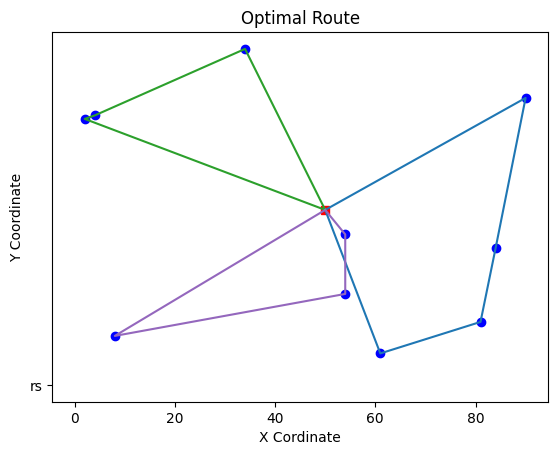

In [42]:
# Running the Genetic Algorithm
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()